# Introduction to Q9

In Question 9 we were asked to simulate solar eclipses in a slightly simplified model of our solar system. A few assumptions allows us to make our modelling slightly simpler.

As well as this, we are given the criteria for an eclipse.

Initially we are given physical constants, such as the mass and radius of the earth, sun and moon as well as the gravitational constant G, initial conditions at 00:00:00, 21st of June 2010, Newton's Equations of motion and the velocity verlet algorithm.

# Modelling Assumptions and their Shortfalls.

Throughout this project we have to have some modelling assumptions that allow us to make our calculations, these come with consequences which are listed below:

### Assume we are in a heliocentric reference frame

- (The sun is in the center and stationary). In reality the gravity from other planetary objects in the solar system causes the sun to move and orbit the barycentre (the common centre of gravity of the solar system) so barycentric reference frame would have been more accurate.

### Assume the ommition of other planetary bodies. 

- This influences the orbit of the earth and the moon (and the sun but it's more of an issue of the reference frame!)

### (Implicitly) Assume Celestial bodies are perfectly spherical, uniform bodies. (Assumed by given radius and mass) 

- This throws off the shadow geometry that we use to predict eclipses later.

### (Implicitly) Assume Newtonian Gravity only included

- (Relativity is not mentioned).

### Assume the velocity verlet algorithm is completely accurate.

- It isn't, infact the error grows in proportion with the (time step)^{3}. So as the simulation progresses for long periods of time, estimates will become more inaccurate.

### Assume that the Umbra length and radius as well as Penumbra radius formulas are exact

- They are an approximation


# Code Overview:

We are given initial positions and velocities of the Earth and the Moon in a heliocentric reference frame. This implies that we can initialise the position vector of the Sun as the zero vector in three dimensions.

## Acceleration of the Earth and Moon

Directly from Newton's Equations, we can derive an equation for the acceleration of the Earth and the Moon and as acceleration is the second derivative of position with respect to time this becomes a differential equation for position.

Force of Earth:
\begin{align*}
m_e \frac{d^2 \vec{r_{e}}}{dt^2}
= G\, m_e m_s \frac{ \vec{r_s} - \vec{r_e} }{ |\vec{r_s} - \vec{r_e}|^3 } + G\, m_e m_m \frac{ \vec{r_m} - \vec{r_e} }{ |\vec{r_m} - \vec{r_e}|^3 }
\end{align*}
Force of the Moon:
\begin{align*}
m_m \frac{d^2 \vec{r_{m}}}{dt^2}
= G\, m_m m_s \frac{ \vec{r_s} - \vec{r_m} }{ |\vec{r_s} - \vec{r_m}|^3 } + G\, m_m m_e \frac{ \vec{r_e} - \vec{r_m} }{ |\vec{r_e} - \vec{r_m}|^3 }
\end{align*}

Dividing by $m_e$ and $m_m$ in each equation respectively and factorising gives us two second-order differential equations to solve in terms of position or an equation for acceleration.

Acceleration of the Earth:
\begin{align*}
\frac{d^2 \vec{r_{e}}}{dt^2}
= G\,(m_s \frac{ \vec{r_s} - \vec{r_e} }{ |\vec{r_s} - \vec{r_e}|^3 } + m_m \frac{ \vec{r_m} - \vec{r_e} }{ |\vec{r_m} - \vec{r_e}|^3 })
\end{align*}
Acceleration of the Moon:
\begin{align*}
\frac{d^2 \vec{r_{m}}}{dt^2}
= G\,(m_s \frac{ \vec{r_s} - \vec{r_m} }{ |\vec{r_s} - \vec{r_m}|^3 } + m_e \frac{ \vec{r_e} - \vec{r_m} }{ |\vec{r_e} - \vec{r_m}|^3 })
\end{align*}

This formula is what the functions accel_earth(rE, rM) and accel_moon(rE, rM) apply. (The arguments rE and rM being the position of the Earth and Moon respectively)

## The Velocity Verlet Algorithm

This algorithm is a numerical second order method of solving a differential equation. The equations are given by the booklet and programmed as the function verlet(rE, vE, rM, vM, dt):

\begin{align*}
r_{k+1} = r_k + v_kdt + \frac{1}{2}\frac{d^{2}\vec{r_k}}{dt^2}dt^{2}
\end{align*}
\begin{align*}
v_{k+1} = v_k + \frac{1}{2}(\frac{d^{2}\vec{r_k}}{dt^2} + \frac{d^{2}{\vec{r}}_{k+1}}{dt^2})dt
\end{align*}
notice that we use the second derivative of position which is just acceleration hence we can use our acceleration function within the velocity verlet function.

## Computing the Geometry of our model

Using acceleration and the Velocity Verlet algorithm we can compute the geometry of our model, and the resulting shadows.

Let S be the Sun and M be the Moon, since sunlight comes from the Sun we can say the vector $\vec{SM}$ is in the direction of sunlight (since sunlight comes from the Sun) and shadows are just the absence of light, they travel in the same direction. Converting this to a unit vector gives us the direction of the shadow axis:
\begin{align*}
\text{Direction of Shadow} = \frac{\vec{SM}}{||\vec{SM}||}
\end{align*}
Now we want to find out how much of the Earth lies in the direction of the shadow, using this we can find out if Earth is in the shadow cast by the Sun. as $\vec{a} \cdot \vec{b}$ = $\lVert \vec{a} \rVert \lVert \vec{b} \rVert \cos{\theta}$ when $\lVert \vec{b} \rVert = 1$ then this gives us the shadow's projection, how much of vector **a** lies in the direction of **b** (the shadow axis) by $\vec{a} \cdot \vec{b}$ = $\lVert \vec{a} \rVert \cos{\theta}$ Now because we have length of the projection, multiplying it by the shadow direction gives us the projection of the Earth onto the shadow axis. Intuitively, this projection is the side such that imagine the plane in which the Moon and the Earth exist, the hypotenuse of this triangle is the $\vec{ME}$ and the adjacent side is the projection, the angle is formed at the Moon. As this is the case, we can work out the perpendicular displacement from the Earth to the shadow axis by doing $\vec{ME}$ - projection and then by taking the magnitude gives us the perpendicular distance. Why is this important? Because it tells us how much of the Earth will be covered by shadow. Large perpendicular distances tell us that the shadow is unlikely to intersect Earth but a small perpendicular distance tells us that more of the Earth is covered by the shadow.

## Testing for an Eclipse

We can now test for an eclipse using this knowledge. Since we have the criteria for an eclipse, all we need to test is that there exists a portion of Earth that exists in either the umbra or penumbra. There exist approximate formulas for the Umbra Length, the Umbra Radius and the Penumbra Radius (We will assume they are exact as they are a very good approximation).
\begin{align*}
\text{Umbra Length} = \frac{d_{sm} r_m}{r_{s} - r_{m}}
\end{align*}
\begin{align*}
\text{Umbra Radius} = r_m\bigg(1-\frac{d_{me}}{L}\bigg)
\end{align*}
\begin{align*}
\text{Penumbra Radius} = r_m\bigg(1+\frac{d_{me}}{L}\bigg)
\end{align*}
where:\
$d_{sm}$ = distance from the Sun to the Moon \
$d_{me}$ = distance from the Moon to the Earth\
$r_s$ = radius of the Sun\
$r_m$ = radius of the Moon 

From the criteria of an eclipse, we know that a total eclipse is when the Earth intersects the umbral shadow. If the Earth intersects the penumbral shadow but not the umbral shadow then it is a partial or annular eclipse. A partial eclipse is when the umbral shadow exists but does not intersect Earth, but the Earth does lie in the penumbra.
\
If on the other hand the umbra can't reach the Earth but does lie in the penumbral shadow then it is an annular eclipse (the Moon blocks the Sun but not completely and is in the center so you see an annulus). If it doesn't intersect either then it's not an eclipse.
\
We can form the following logic and turn it into code by using if statements:

\begin{align*}
\text{Total Eclipse}: d_p < r_u + r_e \text{ and } r_u > 0
\end{align*}
\begin{align*}
\text{Annular Eclipse}: d_p < r_p + r_e \text{ and } r_u < 0
\end{align*}
\begin{align*}
\text{Partial Eclipse}: d_p < r_p + r_e \text{ and } r_u > 0
\end{align*}
where:\
$d_p$ = perpendicular distance of the Earth to the shadow axis.\
$r_u$ = Radius of the Umbra\
$r_p$ = Radius of the penumbra

## The Rough Scan

We technically have enough to run a computation as to where the eclipses may lie, but it will be incredibly computationally expensive. We choose to run 2 scans instead. A scan to check for eclipses using necessary but not sufficient conditions to determine if an eclipse can occur that is significantly less computationally expensive than a full scan.

We choose to use 2 conditions to whittle down candidates.

### 1. The Moon is between the Earth and the Sun

- The angle that the vector $\vec{MS}$ and $\vec{ME}$ needs to form is 180 degrees. It's less computationally expensive to compute the cosine of the angle as we can use the vector dot product to compute the cosine of the angle. and the cosine of 180 degrees corresponds to -1 so instead of having to use an arccos function we can just directly compare the cosine of the angle.
\
- To be completely exact we should check for $\cos{\theta}=-1$ however instead we check for $\cos{\theta}<-0.995$ this is to account for approximations made by our model. Initially this was programmed to be -0.9999 however the tolerance was reduced to be -0.995 as the code omitted partial eclipses in the scan.

### 2. The Moon is close to the Ecliptic Plane.

Initially we programmed the code without this condition, and the amount of possible candidates shot up to a couple thousand candidates instead of a few hundred. This condition helped us reduce the amount of false positives significantly.
\
Firstly, what is the ecliptic plane? It is the plane in which the Moon must intersect to be an eclipse, that is the plane in which the Earth is orbiting the Sun in. We can calculate the normal to this plane by considering the initial velocity and initial position vector of the Earth, we know these two vectors are coplanar, hence by taking the cross product we can get the normal of the plane. Dividing this by its magnitude gives us the unit normal vector of the plane.

\begin{align*}
h_E = \vec{r_e} \times \vec{v_e} \implies \hat{h}_E = \frac{h_E}{\lVert h_E \rVert}
\end{align*}

Using this we can define the ecliptic plane by the vectors that satisfy $r \cdot \hat{h}_E = 0$ since the vector $\hat{h}_E$ is a unit vector, taking the dot product of the position vector of the Moon and the unit normal of the ecliptic plane gives us the projection of the Moon onto the ecliptic plane, telling us how far the Moon is from the ecliptic plane. Ideally, we accept vectors such that $|r \cdot \hat{h}_E| = 0$ however to account for approximations we accept vectors such that $|r \cdot \hat{h}_E| < \text{tolerance}$ Intersection points to the ecliptic plane are called nodes, hence we've named in the code the tolerance as nodeTolerance. The value we chose was an acceptable balance between computational cost and accuracy.
\
If at time t the geometry adheres to both of these conditions we append the time to a list of times. We then integrate using the velocity verlet algorithm and check at the next time step

## Cleaning the list

We then clean the list, removing times that correspond to the same eclipse. This will significantly reduce computation time by checking that the time is not the same as in the eclipses estimates list or within a day of the previous time.

## The Fine Scan

The fine scan is where we expend our computational resources to get an accurate estimate as to where our eclipses lie.\
Firstly from our cleaned list of times of eclipse estimates we check the times around it by a day, and then check the times around it in fine time steps.
But we have to check the position by integrating from our initial time and then getting to our region that we are checking, we integrate in coarse time steps outside the region we are concerned about (dt = 1800) we chose dt = 1800 in this region because any less and we significantly increase computation time and any higher and we decrease accuracy, dt = 1800 is a good compromise. Within the region we are concerned about our dt=10 which gives us a very accurate approximation of the geometry of our system, within the system we use the spatialGeometry function that we have defined to check every time step within the range that we are concerned about and check for the lowest perpendicular distance between the shadow axis and the Earth the lowest perpendicular distance will be our estimate for our central time. We append this to a list as well as the distance from the Moon to the Sun and the distance from the Moon to the Earth as well as the time at which this occurs. 

## Printing our eclipses

With our list, we input the elements of the list into our eclipse test function to find out what type of eclipse the fine scan list has given us.


# Additional Library Imports:

- Imported tqdm from the tqdm library to have a progress bar as the rough and fine scan's progress.
- Imported datetime and timedelta from the datetime library to convert seconds into dates.
- Imported time to compute the runtime of the program.

# Comparison of our Results to Real data (from NASA):
| Date       | Our Type | NASA Type | Our Time (approx) | NASA Central Time (TD) | Notes                                    |
| :--------- | :-------: | :-------: | :----------------: | :--------------------: | :-----------------------------------   |
| 2010-07-11 |   Total   |   Total   |      19:38:20      |        19:34:38        | **~+4 min**                            |
| 2011-11-25 |  Partial  |  Partial  |      06:49:30      |        06:21:24        | **~+28 min**                           |
| 2012-05-21 |  Annular  |  Annular  |      00:37:50      |    23:53:53 (May 20)   | **~+44 min (Across Midnight)**          |
| 2012-11-13 |   Total   |   Total   |      23:07:20      |        22:12:55        | **~+54 min**                           |
| 2013-05-10 |  Annular  |  Annular  |      01:32:50      |        00:26:20        | **~+66 min**                           |
| 2013-11-03 |  Annular  |   Hybrid  |      14:07:10      |        12:47:36        | **~+79 min, Hybrid Not classified**   | 
| 2015-03-20 |  Partial  |   Total   |      11:38:10      |        09:46:47        | **~+111 min, type mismatch**           |
| 2015-09-13 |  Annular  |  Partial  |      10:00:00      |        06:55:19        | **~+185 min, type mismatch**           |
| 2016-03-09 |   Total   |   Total   |      04:12:00      |        01:58:19        | **~+134 min**                          |
| 2016-09-01 |  Annular  |  Annular  |      11:42:40      |        09:08:02        | **~+155 min**                          |
| 2017-02-26 |  Annular  |  Annular  |      17:27:00      |        14:54:32        | **~+153 min**                          |
| 2017-08-21 |   Total   |   Total   |      21:31:50      |        18:26:40        | **~+185 min**                          |
| 2019-07-02 |   Total   |   Total   |      23:20:00      |        19:24:07        | **~+236 min**                          |
| 2019-12-26 |  Annular  |  Annular  |      08:54:20      |        05:18:53        | **~+215 min**                          |
| 2020-06-21 |  Annular  |  Annular  |      10:54:20      |        06:41:15        | **~+253 min**                          |
| 2020-12-14 |   Total   |   Total   |      20:23:00      |        16:14:39        | **~+248 min**                          |
| 2021-06-10 |  Annular  |  Annular  |      15:11:20      |        10:43:06        | **~+268 min**                          |
| 2021-12-04 |   Total   |   Total   |      12:12:30      |        07:34:38        | **~+278 min**                          |
| 2023-04-20 |  Annular  |   Hybrid  |      09:33:40      |        04:17:55        | **~+315 min, Hybrid Not Classified**  |
| 2023-10-14 |  Annular  |  Annular  |      23:17:50      |        18:00:40        | **~+317 min**                          |
| 2024-04-09 |   Total   |   Total   |      00:03:30      |        18:18:29        | **~+6 hrs (Across Midnight)**          |
| 2024-10-03 |  Annular  |  Annular  |      00:23:20      |        18:46:13        | **~+5.5 hrs**                          |
| 2025-03-29 |   Total   |  Partial  |      16:56:10      |        10:48:36        | **~+6 hrs, type mismatch**             |


The error increase from start to finish can be attributed to the error of the velocity verlet algorithm being proportional to (dt)***3 as well as other modelling assumptions. The classification is correct for most eclipses aside from a select few cases. Below is a plot for the error growth:

In [15]:
# Run this cell first

import numpy as np
import pandas as pd

data = [
    (2010.53,  4/60),      # year, error hours
    (2011.90, 28/60),
    (2012.38, 44/60),
    (2012.87, 54/60),
    (2013.36, 66/60),
    (2013.84, 79/60),
    (2015.22, 111/60),
    (2015.70, 185/60),
    (2016.19, 134/60),
    (2016.67, 155/60),
    (2017.16, 153/60),
    (2017.64, 185/60),
    (2019.50, 236/60),
    (2019.98, 215/60),
    (2020.47, 253/60),
    (2020.95, 248/60),
    (2021.44, 268/60),
    (2021.92, 278/60),
    (2023.30, 315/60),
    (2023.78, 317/60),
    (2024.27, 360/60),
    (2024.76, 330/60),
    (2025.24, 360/60),
]

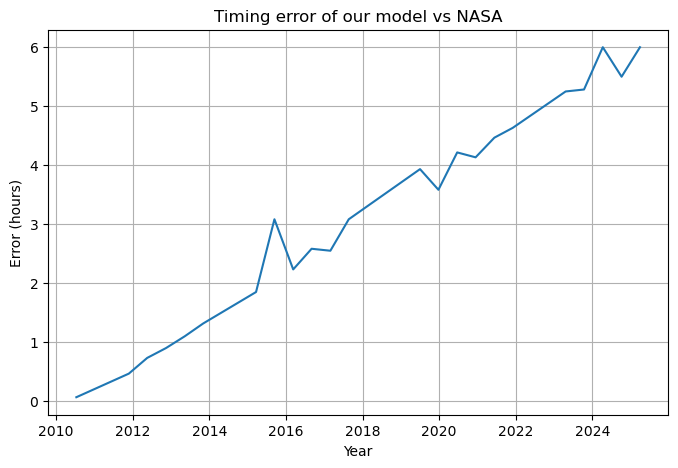

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df["year"], df["err_hours"])
plt.xlabel("Year")
plt.ylabel("Error (hours)")
plt.title("Timing error of our model vs NASA")
plt.grid()
plt.show()

## Conclusion

In Question 9 we successfully simulated the orbits of the Earth and the Moon in a heliocentric reference frame under Newtonian gravity and the velocity verlet algorithm. Using our method we were able to correctly predict 23 solar eclipses to within a few hours of the eclipses actually occuring with only a few mismatches to the labels of the eclipses. The ability to solve the question demonstrates how we can relatively accurately predict solar eclipses using average computational power.\
\
Below is the code we used for the project:

In [4]:
import numpy as np
import numpy.linalg as lag
import time
from datetime import datetime, timedelta
from tqdm import tqdm

G = 6.67348e-11

m_sun = 1.988420392e30
m_earth = 5.972000000e24
m_moon = 7.345828157e22

r_sun = 696340e3
r_earth = 6371e3
r_moon = 1737e3

# ======= Initial Conditions @ 21/6/2010 00:00:00 (All Given in a Heliocentric Reference Frame) =========== 

rE0 = np.array([-0.012083728, -1.394770664, -0.604680716]) * 1e11
rM0 = np.array([-0.015537064, -1.395982236, -0.605576290]) * 1e11

vE0 = np.array([ 2.930141099, -0.032094528, -0.013869403]) * 1e4 
vM0 = np.array([ 2.967343467, -0.121872473, -0.051163801]) * 1e4 

rS = np.zeros(3) # Sun Position fixed at the Origin

# ================ Maths pertaining to the Ecliptic Plane ========================

hE = np.cross(rE0, vE0) # The Normal Vector to the Ecliptic Plane
eclN = hE / lag.norm(hE) # The Unit Normal Vector to the Ecliptic Plane

# ======= Acceleration Functions (Provided Directly from Newton's Equations) ================

def accel_earth(rE,rM):
    rES = rS - rE # Vector going from Earth to Sun
    a = G * m_sun * rES / lag.norm(rES)**3

    rEM = rM - rE # Vector going from Earth to Moon
    a += G * m_moon * rEM / lag.norm(rEM)**3

    return a

def accel_moon(rE,rM):
    rMS = rS - rM # Vector going from Moon to Sun
    a = G * m_sun * rMS / lag.norm(rMS)**3

    rME = rE - rM #Vector going from Moon to Earth
    a += G * m_earth * rME / lag.norm(rME)**3

    return a

# ======== Velocity Verlet Integration ============

# Velocity Verlet Integration has an error proportional to (dt)^3 so as the time increases the estimates have a higher error margin

def verlet(rE,vE,rM,vM,dt): 
    
    # Current Accelerations
    
    aE = accel_earth(rE,rM)
    aM = accel_moon(rE,rM)
    
    # Update Positions
    
    rE_np1 = rE + vE * dt + 0.5 * aE * dt**2
    rM_np1 = rM + vM * dt + 0.5 * aM * dt**2

    # Update Accelerations

    aE_np1 = accel_earth(rE_np1, rM_np1)
    aM_np1 = accel_moon(rE_np1, rM_np1)

    # Update Velocities

    vE_np1 = vE + 0.5 * (aE + aE_np1) * dt
    vM_np1 = vM + 0.5 * (aM + aM_np1) * dt

    return rE_np1, vE_np1, rM_np1, vM_np1

# ========== Modelling for the Spatial Geometry of planetary motion =================

# The purpose of this function is to find whether the earth is inside the shadow cone of the moon.

def spatialGeometry(rE, rM): 

    # Vector Displacements
    
    rMS = rS - rM # Moon -> Sun Displacement vector
    rME = rE - rM # Moon -> Earth Displacement vector

    # Scalar Distances 
    
    sMS = lag.norm(rMS) # Sun -> Moon Distance Scalar
    sME = lag.norm(rME) # Moon -> Earth Distance Scalar

    shadowDirection = -rMS/sMS # Unit Vector in Direction of the Shadow Axis

    # Length of Projection

    projection_length = np.dot(rME, shadowDirection) # This tells us how far along the shadow axis does the earth lies, as shadowDirection is a unit vector
    # a.b = ||a||cos(theta) if b is a unit vector, which shows us that this is in this case rME being projected onto the unit vector of the shadowDirection
    
    projection = projection_length * shadowDirection # This tells us the component of the Displacement vector that is in the direction of the shadow

    pDisp = rME - projection # Perpendicular Displacement Vector
    pDist = lag.norm(pDisp) # Perpendicular Distance (This is the minimising distance between the Earth and the Shadow Axis)

    return sMS, sME, pDist

# ======== Testing for an eclipse ===========

def eclipseTest(sMS, sME, pDist, debug=False):

    # Umbra cone length
    L = sMS * (r_moon / (r_sun - r_moon))

    # Radii
    umbraR = r_moon * (1 - sME / L) # Umbra Radius
    penumbraR = r_moon * (1 + sME / L) # Penumbra Radius
    
# ------------ debug area ------------------------------
    if debug:
        print("ECLIPSE TEST:")
        print(" L =", L)
        print(" umbraR =", umbraR)
        print(" penumbraR =", penumbraR)
        print(" pDist =", pDist)
        print()
# ----------------------------------------------------
    
    # For the Moon to completely block the sun the Umbra's Radius MUST be greater than 0
    if umbraR > 0:
        if pDist < umbraR + r_earth: # We add the Radius of the Earth as the Earth is not a point but approximately a sphere
            return "Total Eclipse"
        if pDist < penumbraR + r_earth: # As the p_dist is greater than the umbra's Radius + the radius of the earth the moon is partially blocking the Sun
            return "Partial Eclipse"
        return None

    # Umbra does NOT reach Earth, so you can only have an Annular Eclipse or No Eclipse
    else:
        if pDist < penumbraR + r_earth: # Moon's shadow is smaller than the light cone of the sun, so creates an annulus
            return "Annular Eclipse"
        return None
        
# ============ Rough Scan ===================

# The purpose of the rough scan is to find out potential candidates for the eclipses, this prevents us from having to run the simulation finely for an insanely long time
# to whittle down computational resources, we then proceed by running a fine scan to deal with this.

def rough_scan(years=15, dt=300): #dt is in seconds

    print("Rough Scan has Started")
    
    seconds = years * 365.25 * 24 * 3600
    steps = int(seconds/dt)

    # Initialise Position and Velocity Vectors of the moon to their Initial vectors
    
    rE, vE = rE0.copy(), vE0.copy()
    rM, vM = rM0.copy(), vM0.copy()

    
    eclipseEstimates = [] # List Containing the Times of our eclipse estimates on our rough scan.

    for step in tqdm(range(steps),desc="Rough Scan",unit="Steps"): # Loops through the cases, appending in the list possible candidates for eclipses
        t = step * dt

        rMS = rS - rM # Vector from moon -> sun
        rME = rE - rM # Vector from moon -> earth

        cos_angle = np.dot(rMS, rME) / (lag.norm(rMS)*lag.norm(rME)) # This is the angle between the vector from the Moon to the Sun and the vector from the Moon to the Earth.
        
        colinear = (cos_angle<-0.995) # The colinear check, checks that the 2 vectors are approximately colinear and the vectors are in opposite directions to eachother
        # the reason the restriction is to <-0.995 is so that it takes into account the error from the velocity verlet integration.

        # Ecliptic Plane Geometry Checks - This Check is necessary to whittle down candidates as to be an eclipse the moon must intersect the ecliptic plane.
        # Without this check the number of possible candidates increases by over 10x So this significantly reduces the runtime and increases the accuracy
        sEcliptic = abs(np.dot(rM, eclN)) # Distance from Moon to the Ecliptic Plane
        nodeTolerance = 3e6 
        near_node = (sEcliptic < nodeTolerance) # A node is an intesecting point of the ecliptic plane, this checks that the moon is near the node to a reasonable degree
        if colinear and near_node: # All three checks must be successful in order for it to be a possible eclipse.
            eclipseEstimates.append(t)

        # Integrate to use for next step @ the next time step
        rE, vE, rM, vM = verlet(rE, vE, rM, vM, dt)

    print("Rough Scan Complete")
    
    return eclipseEstimates

# ========== Fine Scan ===============

# Since we already have the rough scan we can use the time values for our rough scan and look through the interval of the rough scan to work out the fine scan times.

def fine_scan(tc, window_hr=12, dt=10, dt_skip=300):

    # tc = time estimate, which is our center time.
    # window_hr = the window either side of tc in which it checks for the time of the solar eclipse in the fine scan
    # dt = The time steps within our window
    # dt_skip = The time steps outside our window
    
    t0 = max(0, tc - window_hr*3600) # Start Time (Max to prevent t0 being negative)
    t1 = tc + window_hr*3600 # End Time

    # Reset Initial Conditions
    rE, vE = rE0.copy(), vE0.copy()
    rM, vM = rM0.copy(), vM0.copy()

    t = 0 # Need to start @ t = 0 to do the integration as it's constantly moving.
    jump = 1800 # Jumps of 30 minutes is about optimal for as much accuracy while not sacrificing computational resources
    while t < t0 - jump:
        rE, vE, rM, vM = verlet(rE, vE, rM, vM, jump)
        t += jump

    # Then refine with dt_skip to integrate our way closer to t0 with minimal computational resources.
    while t < t0:
        step_dt = min(dt_skip, t0 - t)
        rE, vE, rM, vM = verlet(rE, vE, rM, vM, step_dt)
        t += step_dt

    
    t_ref = sMS_ref = sME_ref = None # Starts off with nothing but then gets appended as better estimation arises.
    pDist_ref = 1e20 # Refined Perpendicular Distance Estimate (which will get minimised) We start off super high and work our way down

    while t < t1:

        sMS, sME, pDist = spatialGeometry(rE,rM) # Computes the Geometry at the current t

        if pDist < pDist_ref: # Constantly keeps the most refined estimate for pDist and pDist_ref
            pDist_ref = pDist
            t_ref = t
            sMS_ref = sMS
            sME_ref = sME
                
        # Step Integrator
        rE, vE, rM, vM = verlet(rE, vE, rM, vM, dt)
        t += dt
        
    return t_ref, sMS_ref, sME_ref, pDist_ref

# ======== Convert seconds to datetime ========

initialTime = datetime(2010, 6, 21, 0, 0, 0) # Our Initial Time that we work from provided by the booklet.

# Following function converts the seconds into time
def dateConversion(t):
    return initialTime + timedelta(seconds=t) 

# ======== Computations ============

print("Run time has started")
start = time.time() # Starts timing the process
rough_times = rough_scan(years=15, dt=3600)
print("Number of Rough Candidates:",len(rough_times))

cleaned = [] # To avoid duplicate fine_scan calls to save computation time.
print("Cleaning Rough Scan List")
for t in rough_times:
    if not cleaned or abs(t-cleaned[-1]) > 86400: # The abs(t-cleaned[-1]) exists to only have one time to exist to be the representative for the eclipse
        cleaned.append(t)

rough_times = cleaned # Sets the rough times list as the cleaned list
print(f"Rough Scan list Cleaned to {len(rough_times)} Candidates")

refined_results = [] # List of the refined results

print("Fine Scan has Started")

for tc in tqdm(rough_times,desc="Fine Scan",unit="Candidates"):
    t_ref, sMS, sME, pDist = fine_scan(tc, window_hr=12, dt=10, dt_skip=300)
    refined_results.append((t_ref, sMS, sME, pDist)) 
print("Number of fine candidates:", len(refined_results))    
print("Fine Scan Complete")

# ======== Extract real eclipses from refined_results ========

def extract_eclipses(refined_results, debug=False):
    print("Extracting Eclipses")
    eclipse_list = [] # The list of eclipses

    for (t_ref, sMS, sME, pDist) in refined_results:
        etype = eclipseTest(sMS, sME, pDist) # Return the type of eclipse
        
# --------------------------- debug area ------------------------------------------
        if debug:
            print("t =",t_ref)
            print("sMS=",sMS)
            print("sME=",sME)
            print("pDist =",pDist)
            print("eclipseTest =", etype)
            print()
# -------------------------------------------------------------------------------------
        
        if etype is not None: # Eliminates Non-Eclipses to rid false positives
            eclipse_list.append((t_ref, etype))

    return eclipse_list

# =================== Print eclipse list =============================

def print_eclipses(eclipse_list):
    print(f"There are {len(eclipses)} predicted eclipses in this time period:")
    print("\nPredicted Eclipses (YYYY / MM / DD):\n")
    for t, etype in eclipse_list:
        print(f"{dateConversion(t)} | {etype:13}") # Prints the Date and Time and the type of eclipse


eclipses = extract_eclipses(refined_results)
print_eclipses(eclipses)
print("\nTotal Runtime:",time.time() - start, "seconds")

Run time has started
Rough Scan has Started


Rough Scan: 100%|██████████| 131490/131490 [00:08<00:00, 14881.46Steps/s]


Rough Scan Complete
Number of Rough Candidates: 231
Cleaning Rough Scan List
Rough Scan list Cleaned to 23 Candidates
Fine Scan has Started


Fine Scan: 100%|██████████| 23/23 [03:18<00:00,  8.64s/Candidates]

Number of fine candidates: 23
Fine Scan Complete
Extracting Eclipses
There are 23 predicted eclipses in this time period:

Predicted Eclipses (YYYY / MM / DD):

2010-07-11 19:38:20 | Total Eclipse
2011-11-25 06:49:30 | Partial Eclipse
2012-05-21 00:37:50 | Annular Eclipse
2012-11-13 23:07:20 | Total Eclipse
2013-05-10 01:32:50 | Annular Eclipse
2013-11-03 14:07:10 | Annular Eclipse
2015-03-20 11:38:10 | Partial Eclipse
2015-09-13 10:00:00 | Annular Eclipse
2016-03-09 04:12:00 | Total Eclipse
2016-09-01 11:42:40 | Annular Eclipse
2017-02-26 17:27:00 | Annular Eclipse
2017-08-21 21:31:50 | Total Eclipse
2019-07-02 23:20:00 | Total Eclipse
2019-12-26 08:54:20 | Annular Eclipse
2020-06-21 10:54:20 | Annular Eclipse
2020-12-14 20:23:00 | Total Eclipse
2021-06-10 15:11:20 | Annular Eclipse
2021-12-04 12:12:30 | Total Eclipse
2023-04-20 09:33:40 | Annular Eclipse
2023-10-14 23:17:50 | Annular Eclipse
2024-04-09 00:03:30 | Total Eclipse
2024-10-03 00:23:20 | Annular Eclipse
2025-03-29 16:56:10